In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

For EV Market Analyis, first we will explore the EV adoption over time - Change in EV population by model year

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [9]:
ev_count_by_model_year = df['Model Year'].value_counts().sort_index()
ev_count_by_model_year

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

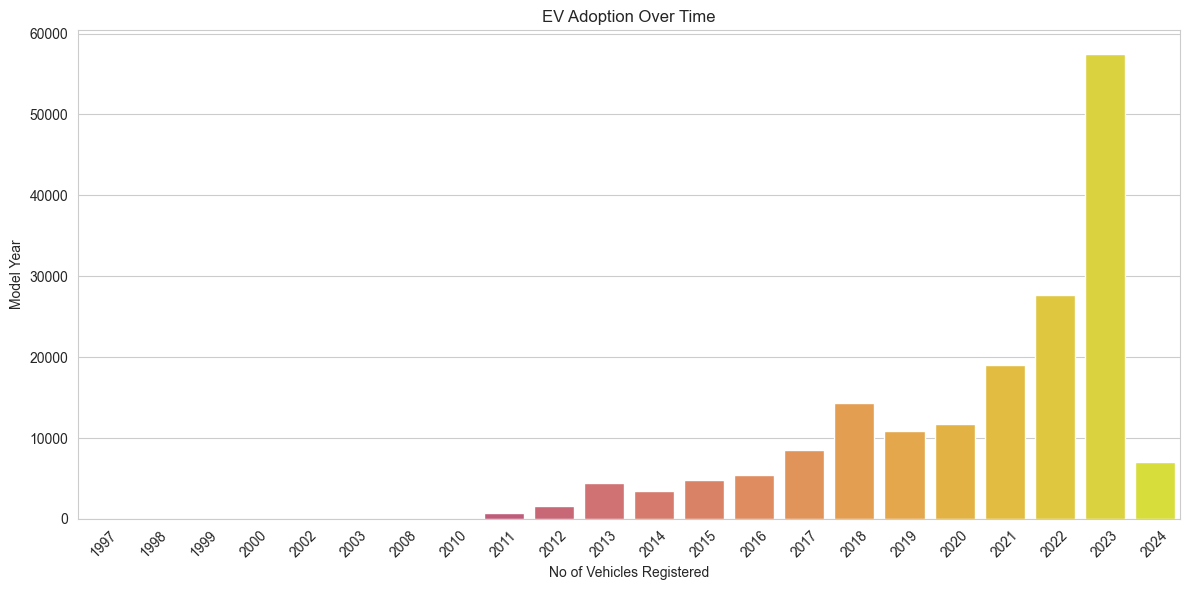

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=ev_count_by_model_year.index,y= ev_count_by_model_year.values,hue=ev_count_by_model_year.index,palette = 'plasma',legend= False)
plt.title('EV Adoption Over Time')
plt.xlabel('No of Vehicles Registered')
plt.ylabel('Model Year')
plt.xticks(rotation=45)
plt.tight_layout()


From the above plot it can be observed that there has been a steady increase in EV adoptions over time. The no of registrations grows modestly until 2016 after which there is a sharp increase till 2023. 2023 shows the highest no of EV registrations as shown by the peak.

Now we'll analyse the top 3 counties of EV registrations and then analyze the distribution in the cities of those counties.

In [11]:
ev_county_dist = df['County'].value_counts()
top_counties = ev_county_dist.head(3).index
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [12]:
top_counties_data = df[df['County'].isin(top_counties)]


In [13]:
city_dist = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
city_dist

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
...,...,...,...
108,Snohomish,Alderwood Manor,1
109,Snohomish,Startup,1
110,King,Gold Bar,1
111,Pierce,Kapowsin,1


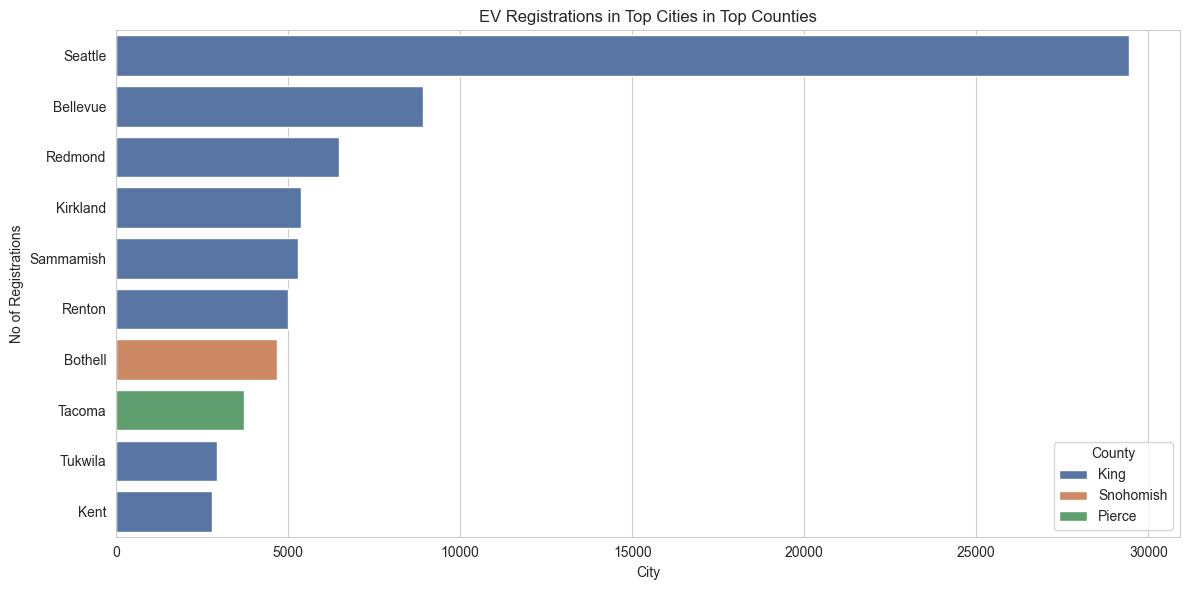

In [14]:
# top 10 cities across these counties

top_cities_dist = city_dist.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles',y ='City', hue = 'County', palette = 'deep', data = top_cities_dist)
plt.title('EV Registrations in Top Cities in Top Counties')
plt.xlabel('City')
plt.ylabel('No of Registrations')
plt.legend(title='County')
plt.tight_layout()

The abopve graph compares no of ev registrations in cities of 3 counties : King, Snohomish, Pierce.
- Seattle, in King, has the highest no of registrations by a far margin.
- Bellevue and Redmond follow next.
- Bothell, in Snohomish, and Tacoma, in Pierce, have moderate no of ev registrations.
- The majority no of cities with high registerations are of King.
- Overall, the graph indicates ev registrations are not uniform across the cities and more concentrated in ceratin areas.

Now we explore the breakdown between different types of EVs, providing customer insights and adoption patterns of different types.

In [15]:
ev_types = df['Electric Vehicle Type'].value_counts()
ev_types

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

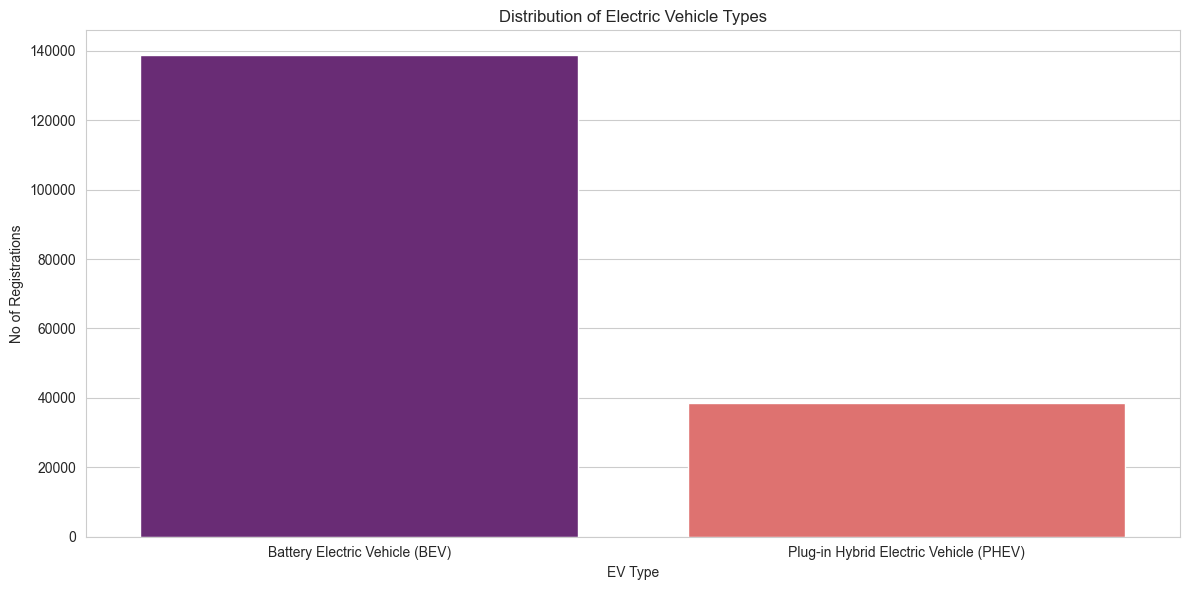

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=ev_types.index, y= ev_types.values, hue = ev_types.index, palette = 'magma')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('EV Type')
plt.ylabel('No of Registrations')
plt.tight_layout()

From the plot, we can observe that Battery EV is more popular over PHEVs.

Now let's focus on popular manufacturers and models that domainate the EV industry, indicating consumer preferences, brand loyalty and manufacturer's success.

In [17]:
ev_makes = df['Make'].value_counts()
top_ev_makes = ev_makes.head(10)

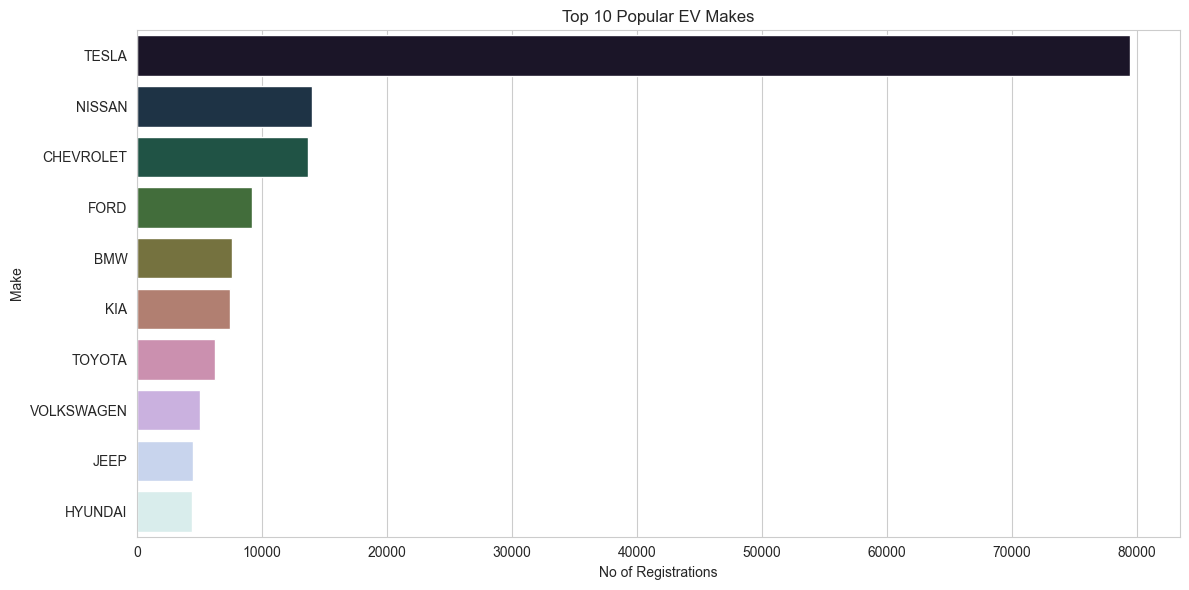

In [18]:
# most popular manufacturers

plt.figure(figsize=(12,6))
sns.barplot(x=top_ev_makes.values, y = top_ev_makes.index, hue=top_ev_makes.index, palette = 'cubehelix')
plt.title('Top 10 Popular EV Makes')
plt.xlabel('No of Registrations')
plt.ylabel('Make')
plt.tight_layout()

From this plot, we can observe that Tesla is the most popular among all makes having a significant margin.
Nissan is the second most popular closely followed by Chevrolet. 

Now we analyse the top models within these top manufacturers.

In [19]:
top_3_makes = top_ev_makes.head(3).index
top_makes_data = df[df['Make'].isin(top_3_makes)]
model_dist_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models = model_dist_top_makes.head(10)

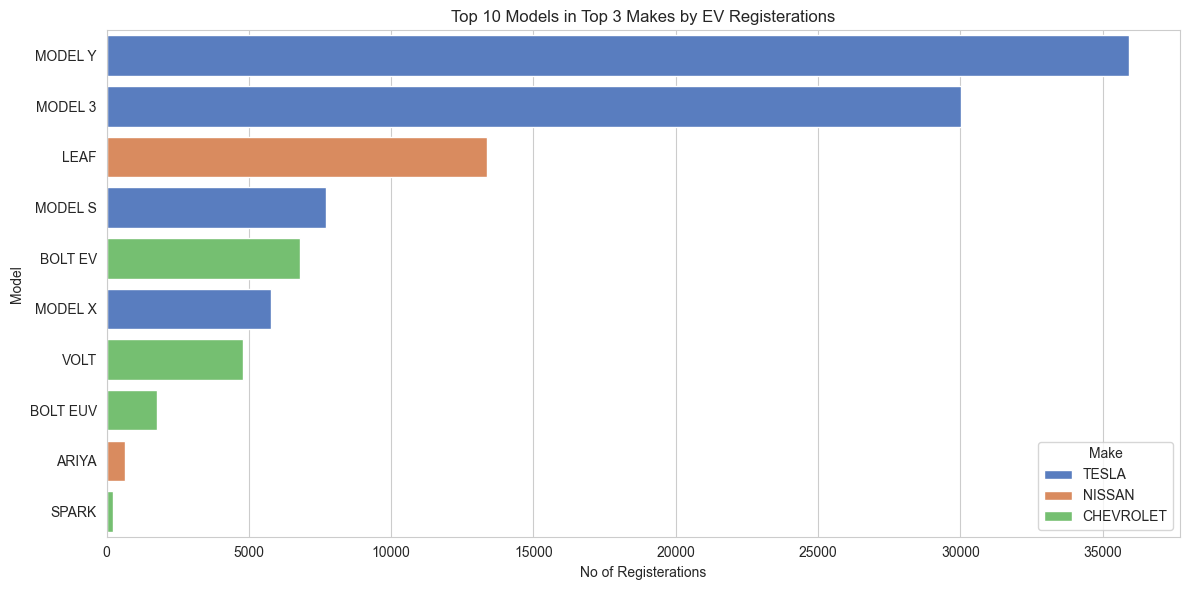

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles', y = 'Model', hue= 'Make', data = top_models, palette = 'muted')
plt.title('Top 10 Models in Top 3 Makes by EV Registerations')
plt.xlabel('No of Registerations')
plt.ylabel('Model')
plt.tight_layout()


We can observe that Model Y of Tesla is the most popular followed by Model 3.
Nissan's LEAF is the third most registered model and the most registerd non - Tesla model.
Chevrolet's Bolt EV, Volt have considerable registerations followed by Bolt EUV.

Now we'll explore the electric range of EVs to analyze the market size of EVs. Let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:

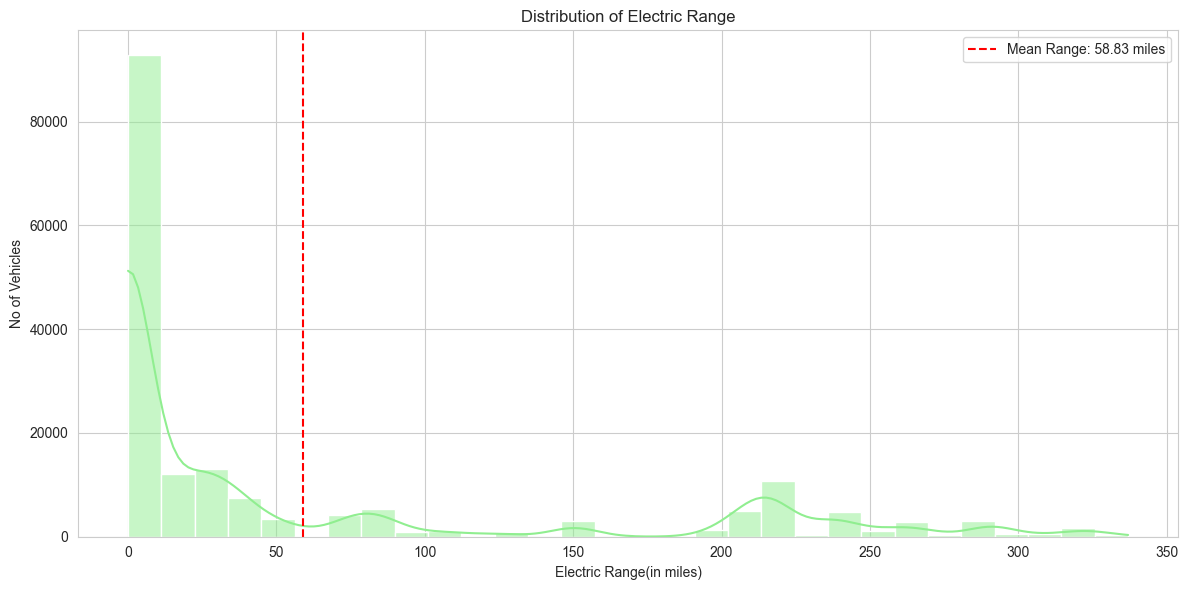

In [32]:
plt.figure(figsize = (12,6))
sns.histplot(df['Electric Range'], bins = 30, kde = True, color = 'lightgreen')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range(in miles)')
plt.ylabel('No of Vehicles')
plt.axvline(df['Electric Range'].mean(), color= 'red', linestyle = '--', label = f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.tight_layout()

The above graph shows the mean range.
- There is a high frequency of vehicles with low electric range with a good amount having range below 50.
- The mean range is 58.83 miles, which is relatively low compared to higher ranges shown in graph.
- The distribution is skewed to the right, with a long tail extending towrds higher ranges, although the no of vehicles with higher ranges are considerably less.


The average range is lower overall due to righlty skewed ditribution of ranges, with low number of vehicles with higher range.

Now we'll observe the trend of Electric ranges over model years, which can provide insights into how advancements in battery technology have influenced the range cappabilites of EVs over time.  positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges.

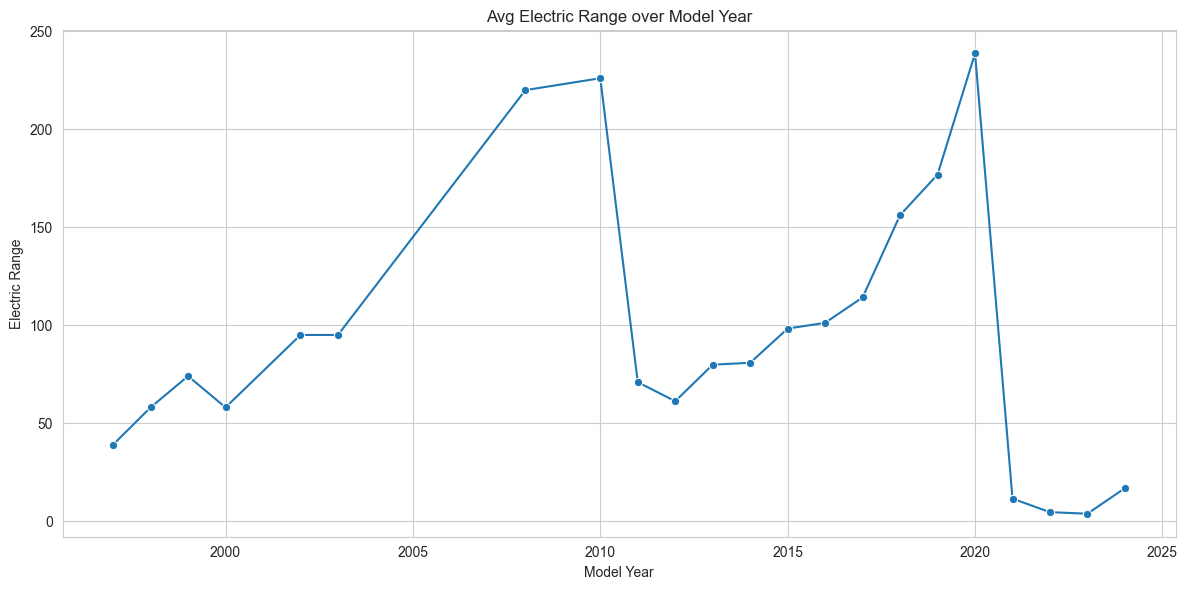

In [37]:
avg_range_over_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y = 'Electric Range', data = avg_range_over_year, marker='o')
plt.title('Avg Electric Range over Model Year')
plt.xlabel('Model Year')
plt.grid(True)
plt.tight_layout()

The graph shows the progression of avg electric range over the model years 2000-2024. The observations that we can make are:
- There is a general upward trend of the avg range over the years.
- There is a noticeable peak in year 2020 when the average range is at highest point.
- There is a significant drop in the range after 2020, probably due to missing data or introductionof several lower range models.
- There is considerable steady growth in range after the drop from 2024.

Now to see how electric range varies over different manufacturers and models.

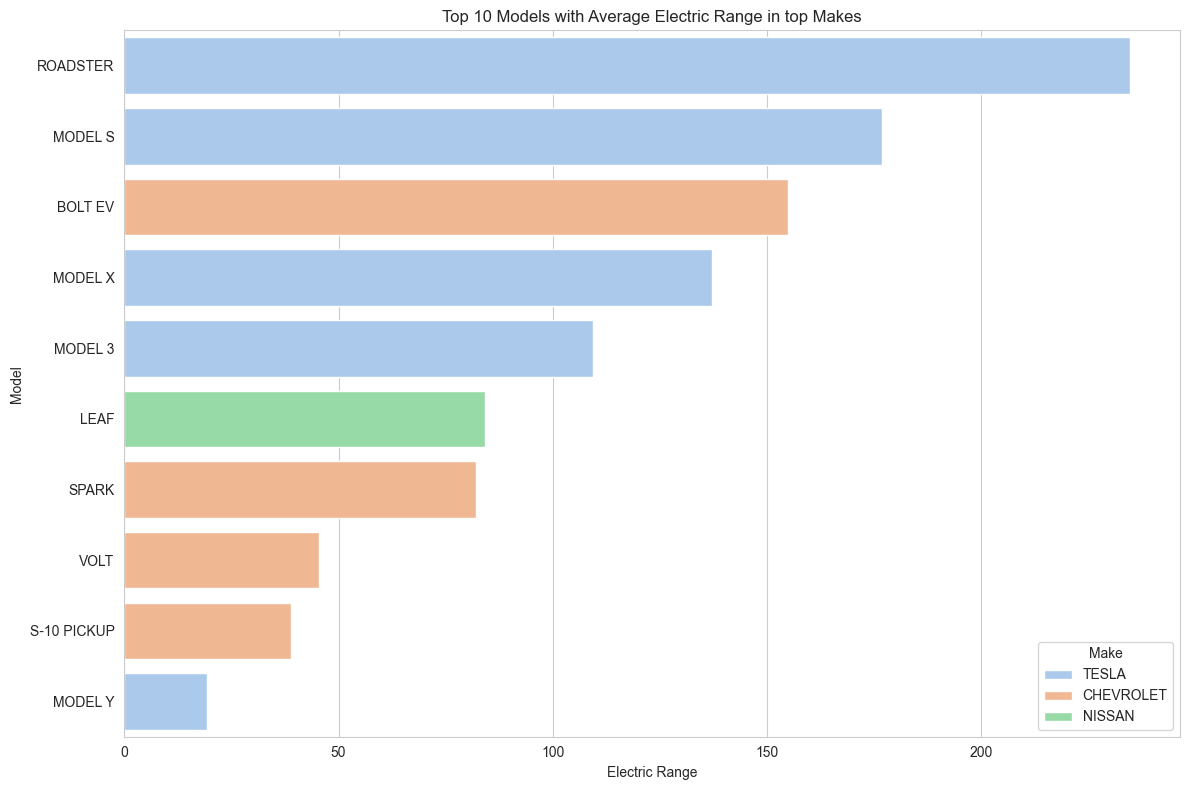

In [49]:
avg_range_over_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = avg_range_over_model.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range', y = 'Model', hue='Make',data = top_range_models, palette = 'pastel')
plt.title('Top 10 Models with Average Electric Range in top Makes')
plt.xlabel('Electric Range')
plt.ylabel('Model')
plt.legend(title='Make')
plt.tight_layout()

- The Tesla Roadster has the highest average electric range.
- Tesla's Model S, X, 3 are also among the top 10 having higher average elctric range.
- The Chevrolet Bolt EV is an outlier among the Chevrolet models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. 

## Market Size EV Analysis in US

In [52]:
ev_reg_counts = df['Model Year'].value_counts().sort_index()
ev_reg_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

# Observations:
- In 2021, 19063 EVs were registered.
- In 2022, 27708 and in 2023, a significant increase of 57519 EV registerations was observed.
- In 2024, 7072 EVs were currently registered, implying partial data.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.



We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years.

In [54]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_reg_counts[ev_reg_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x,a,b):
    return a * np.exp(b*x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_yrs = np.arange(2024, 2024+6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_yrs, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_yrs + filtered_years.index.min(),forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


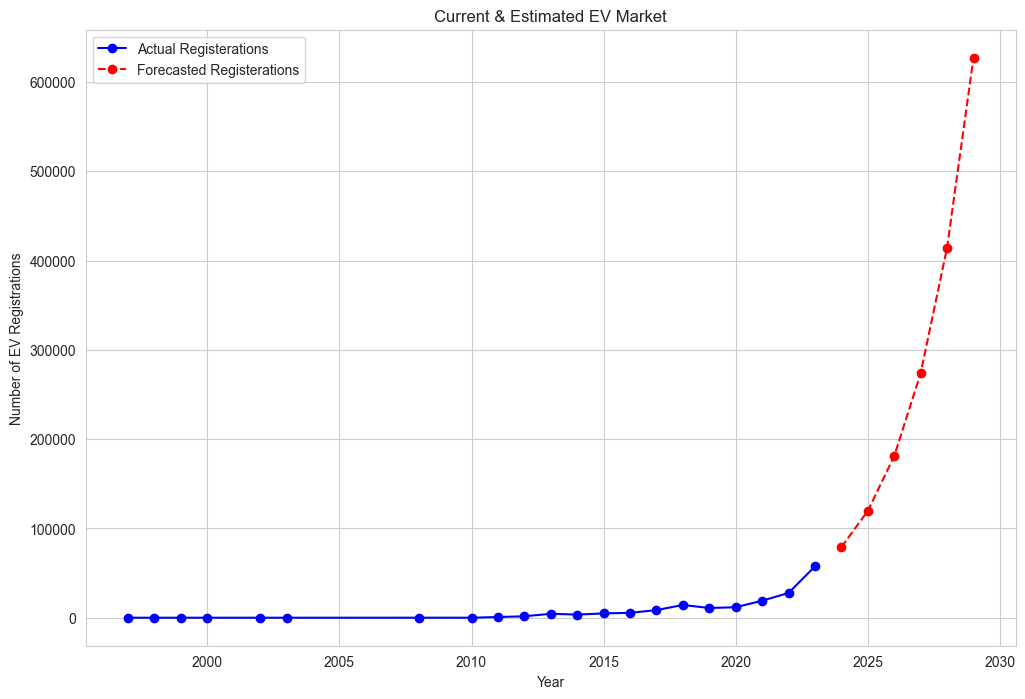

In [55]:
years = np.arange(filtered_years.index.min(), 2029+1)
actual_years = filtered_years.index
forecasted_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecasted_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registerations')
plt.plot(forecasted_years_full, forecasted_values_full, 'ro--', label = 'Forecasted Registerations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

- The no of EV registerations remain low till 2010 after which there is a consistent and steep upward trend, suggesting a significant trend in EV adoption.
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

We can conclude that EV market size is expected to expand in coming years. The data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.